## ElasticNetCV 回归 备用

In [50]:
# 导入必要的工具包
import numpy as np #用于数值计算
import pandas as pd #用于数据表处理，数据文件读写
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

import matplotlib.pyplot as plt #用于绘图：分析结果的可视化。
import seaborn as sns #用于绘图：分析结果的可视化。封装更好。
from IPython.display import display

#应该是设置浮点数的形式格式，小数点后三位
pd.set_option('display.float_format', lambda x: '%.4f' % x)

#这一行是干嘛的？ 设置 matplotlib 让绘制的图形出现在 Notebook 里而不是新窗口
%matplotlib inline

In [78]:
Y_Standard = True
# 生成的结果文件编号
out_id = 1
out_name = '%ssummit=0.1-fe-%s-%s.csv'

path  = '../data/new/'
path_train = '../data/new/train=0.1/'
path_test = '../data/new/test/'
summit_path = '../data/summit/'

In [79]:
#读取训练数据: 
train = pd.read_csv(path_train + 'train=0.1-fe.csv')
train.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,2320186,124,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3.8333,0.0000,0,0.0000
1,2959017,121,129429,78242,0,0,6000,0,152480,48626,...,0,0,0,2,2,2,3.1667,0.0000,0,0.0000
2,242613,122,84839,52467,0,0,0,0,22144,29600,...,0,0,0,0,0,0,2.6667,0.0000,0,0.0000
3,1416097,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.3333,0.0000,0,0.0000
4,680469,104,28625,7200,0,0,0,0,33625,3930,...,0,0,0,0,0,0,1.0000,0.0000,0,0.0000


In [80]:
test = pd.read_csv(path_test + 'tap_fun_test-fe.csv')
test.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count
0,14933,94,166415.0000,138362.0000,0,0,0,0,258522,90142,...,0,0,0,0,1,1,1,8.0000,0.0000,0
1,14934,94,10000.0000,600.0000,0,0,0,0,10000,400,...,0,0,0,0,0,0,0,0.1667,0.0000,0
2,14935,94,10000.0000,3700.0000,0,0,0,0,10000,2000,...,0,0,0,0,0,0,0,17.0000,0.0000,0
3,14936,94,210000.0000,0.0000,200000,0,200000,0,610000,0,...,0,0,0,0,0,0,0,1.6667,0.0000,0
4,14937,94,11500.0000,3700.0000,0,0,0,0,11000,2000,...,0,0,0,0,0,0,0,0.3333,0.0000,0


In [81]:
# 从原始数据中分离输入特征x和输出y
target = 'prediction_pay_price'
id = 'user_id'
train_y = train[target].values
train_X = train.drop([target, id], axis = 1)

# test_id = test[id]
test_X = test.drop([id], axis = 1)

In [82]:
X_train_part, X_val_part, y_train_part, y_val_part = train_test_split(train_X, train_y, random_state=33, test_size=0.1)
print('train.shape=%s X_train_part.shape=%s X_test_part.shape=%s'
      %(train.shape, X_train_part.shape, X_val_part.shape))

train.shape=(228800, 109) X_train_part.shape=(205920, 107) X_test_part.shape=(22880, 107)


## 数据标准化

In [83]:
# 分别初始化对特征和目标值的标准化器
ss_X = StandardScaler()
ss_y = StandardScaler()

# 分别对训练和测试数据的特征以及目标值进行标准化处理
X_train_part = ss_X.fit_transform(X_train_part)
X_val_part= ss_X.transform(X_val_part)
test_X = ss_X.transform(test_X)

if Y_Standard:
    y_train_part = ss_y.fit_transform(y_train_part.reshape(-1, 1))
    y_val_part = ss_y.transform(y_val_part.reshape(-1, 1))

In [8]:
# 标准化数据还原 
def inverse_StandardScaler(predict):
    if Y_Standard:
        predict = ss_y.inverse_transform(predict)
        print('predict = ', predict)
    return predict

#输出预测后的数据
def generate_summit(predict):
    testPredict = test.copy()
    testPredict[target] = predict
    testPredict = testPredict[[id,target]]
    testPredict[target] = testPredict[target].apply(lambda x: x if x > 0 else 0)
    return testPredict

### 3. 正则化的线性回归 ElasticNetCV 

In [86]:
%%time
l1_ratio = [.1, .2, .3, .4, .5, .6, .7, .8, .9]

# Lasso 模型实例
elastic_net = ElasticNetCV(l1_ratio=l1_ratio, eps=0.001, n_jobs=-1)

#进行模型训练
elastic_net.fit(X_train_part, y_train_part)

Wall time: 18.9 s


In [87]:
print ('best alpha is:%s  l1_ratio_:%s' % (elastic_net.alpha_, elastic_net.l1_ratio_))
# best alpha is:1.853019181787895  l1_ratio_:0.1

best alpha is:2.284488656390809  l1_ratio_:0.1


best alpha is: 2.284488656390809


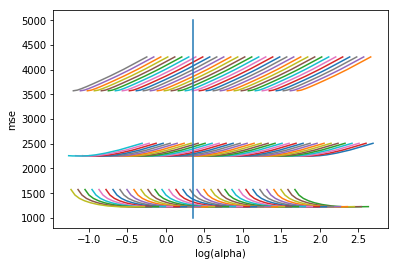

In [88]:
## 3.1 Lasso 模型评价
mses = np.mean(elastic_net.mse_path_, axis=1)

#plt.plot(np.log10(alphas), mses)
plt.plot(np.log10(elastic_net.alphas_), mses)
# plt.show()  #绘制在一张图上，显示异常，暂时分开 

plt.plot(np.log10(elastic_net.alpha_)*np.ones(3), [1000, 3000, 5000])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
# plt.show() 
print ('best alpha is:', elastic_net.alpha_)
# best alpha is: 10.5

In [89]:
# 使用 elastic_net 模型自带的评估模块（r2_score），并输出评估结果
#训练集
elastic_netScoreTrain = elastic_net.score(X_train_part, y_train_part)
elastic_netScoreVal = elastic_net.score(X_val_part, y_val_part)
print('The score of ElasticNet: Train=%s  Val=%s'% (elastic_netScoreTrain, elastic_netScoreVal)) 

elastic_net_predict_train = elastic_net.predict(X_train_part)
rmseTrain = mean_squared_error(y_train_part, elastic_net_predict_train) ** 0.5
elastic_net_predict_val = elastic_net.predict(X_val_part)
rmseVal = mean_squared_error(y_val_part, elastic_net_predict_val) ** 0.5
print('The RMSE: Train=%s  Val=%s' % (rmseTrain, rmseVal))

# The score of ElasticNet: Train=0.5933701157431497  Val=0.6918598273465699
# The RMSE: Train=40.40916662890711  Val=51.351069750253906

The score of ElasticNet: Train=0.5947500405888557  Val=0.7210820878201489
The RMSE: Train=40.34054279764321  Val=48.855508438254596


In [90]:
#对测试数据进行预测
elastic_net_predict_test = elastic_net.predict(test_X)
print('elastic_net_predict_test = ', elastic_net_predict_test)

# 标准化数据还原 
elastic_net_predict_test = inverse_StandardScaler(elastic_net_predict_test)

elastic_net_predict_test =  [ 0.03653188 -0.33087724 -0.38107543 ... -0.98596774 -0.27644608
 -0.27644608]


In [91]:
testPredict = generate_summit(elastic_net_predict_test)
testPredict.head()

,user_id,prediction_pay_price
0,14933,0.0365
1,14934,0.0000
2,14935,0.0000
3,14936,0.7029
4,14937,0.0000


In [92]:
#输出预测后的数据
testPredict.to_csv(out_name %(summit_path, 'ElasticNetCV', out_id), index=False)
out_id += 1
testPredict.shape

(828934, 2)